Install typing & langgraph
- uv add typing
- uv add langgraph

In [9]:
from typing import TypedDict, Annotated, List
import operator

from IPython.display import display, Image
from langgraph.graph import StateGraph, END, START

State = keadaan / kondisi -> digambarkan oleh satu set variable

In [10]:
# proses membuat kopi (3 buah proses/node)
# 1. cek apakah bahan tersedia
# 2. manasin air
# 3. buat kopi

In [11]:
# mendefinisikan state

class CoffeeState(TypedDict):
    steps_completed: Annotated[List[str], operator.add]
    current_step: str
    is_coffee_ready: bool
    has_ingredients: bool

In [12]:
# fungsi untuk mengecek bahan

def check_ingredients_node(state: CoffeeState) -> CoffeeState:
    print("Sedang memeriksa bahan...")
    return {
        "steps_completed": ["Semua bahan (air, kopi, gula) tersedia"],
        "current_step": "ingredients_checked",
        "is_coffee_ready": False,
        "has_ingredients": True,
    }

In [13]:
def boil_water_node(state: CoffeeState) -> CoffeeState:
    print("Sedang merebus air...")
    return {
        "steps_completed": ["Rebus air hingga mendidih"],
        "current_step": "water_boiled",
        "is_coffee_ready": False,
        "has_ingredients": state["has_ingredients"],
    }

In [14]:
def make_coffee_node(state: CoffeeState) -> CoffeeState:
    print("Sedang membuat kopi...")
    return {
        "steps_completed": ["Seduh kopi dengan air panas"],
        "current_step": "coffee_made",
        "is_coffee_ready": True,
        "has_ingredients": state["has_ingredients"],
    }

In [15]:
# susun graphnya

workflow = StateGraph(CoffeeState)

# definisikan nodes
workflow.add_node("check_ingredients", check_ingredients_node)
workflow.add_node("boil_water", boil_water_node)
workflow.add_node("make_coffee", make_coffee_node)

# definisikan edges
workflow.add_edge(START, "check_ingredients")
workflow.add_edge("check_ingredients", "boil_water")
workflow.add_edge("boil_water", "make_coffee")
workflow.add_edge("make_coffee", END)

app = workflow.compile()

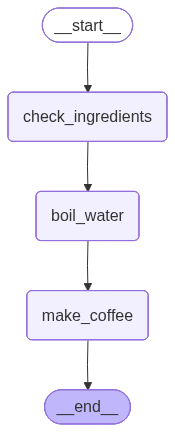

In [16]:
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
# mendefinisikan state awal
initial_state: CoffeeState = {
    "steps_completed": [],
    "current_step": "start",
    "is_coffee_ready": False,
    "has_ingredients": False,
}

In [18]:
result = app.invoke(initial_state)

Sedang memeriksa bahan...
Sedang merebus air...
Sedang membuat kopi...


In [20]:
result

{'steps_completed': ['Semua bahan (air, kopi, gula) tersedia',
  'Rebus air hingga mendidih',
  'Seduh kopi dengan air panas'],
 'current_step': 'coffee_made',
 'is_coffee_ready': True,
 'has_ingredients': True}